In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cm as cm

### HPI Data Preprocessing & Visualization Specs

In [3]:
file_path = '/Users/katepoole/Documents/KINGS/Data Viz/Final Project/~Data/UK-HPI-full-file-2022-12.csv'

In [4]:
df = pd.read_csv(file_path)
df.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [5]:
# convert date variable to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# limit data to 1995 - on
df_filtered = df[df['Date'].dt.year >= 1995]

In [17]:
# add year variable to df
df_filtered['Year'] = df_filtered['Date'].dt.year

/var/folders/m6/t786km0s2gj___42n4vm3gnr0000gn/T/ipykernel_11992/3263782396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Year'] = df_filtered['Date'].dt.year


In [7]:
# Create a dictionary with the provided population data
pop_data = {
    'Year': [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'Population': [51271978, 51410433, 51559648, 51720104, 51933471, 52140181, 52359978, 52602143, 52863238, 53152022, 53575343, 53950854, 54387392, 54841720, 55235253, 55692423, 56170927, 56577740, 56989744, 57444107, 57881415, 58366199, 58700914, 59008368, 59317788, 59430444, 59660524, 60238038]
}

# Create a DataFrame from the dictionary
pop_df = pd.DataFrame(pop_data)
pop_df.head()

,Year,Population
0,1995,51271978
1,1996,51410433
2,1997,51559648
3,1998,51720104
4,1999,51933471


In [8]:
# create % change variable
pop_df['pct_change'] = pop_df['Population'].pct_change() * 100
pop_df.head()

,Year,Population,pct_change
0,1995,51271978,NaN
1,1996,51410433,0.270040
2,1997,51559648,0.290243
3,1998,51720104,0.311205
4,1999,51933471,0.412542


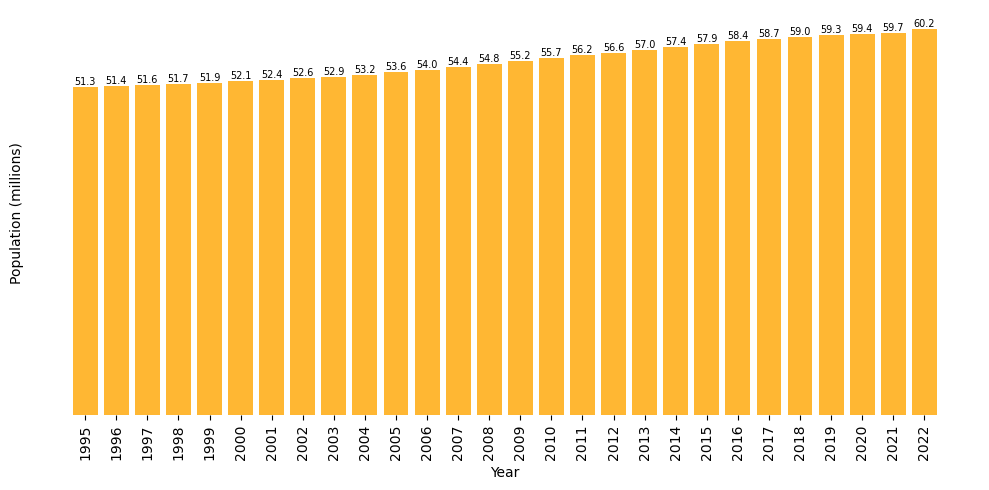

In [32]:
# plot population data barchart 
plt.figure(figsize=(10, 5))
bars = plt.bar(pop_df['Year'], pop_df['Population'], color='orange', alpha=0.8)
#plt.title('Population by Year')
plt.xlabel('Year')
plt.ylabel('Population (millions)')
plt.yticks([])
plt.xticks(pop_df['Year'],rotation=90)

# Add labels to the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height / 1000000:.1f}',
             ha='center', va='bottom', fontsize=7, color='black')  # Adjusted text label format  
  
# remove square
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# show plot
plt.tight_layout()
plt.show()

In [19]:
# Group df by year 
grouped_year_df = df_filtered.groupby('Year').mean()
grouped_year_df.head(15)

/var/folders/m6/t786km0s2gj___42n4vm3gnr0000gn/T/ipykernel_11992/2730900861.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_year_df = df_filtered.groupby('Year').mean()


,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
Year,,,,,,,,,,,,,,,,,,,,,
1995,56876.832853,28.030171,28.031093,-0.028675,0.892857,51649.570894,814.209670,98077.873731,28.760681,-0.092710,...,66037.110600,27.971574,0.111244,0.000000,110.745544,56309.468334,28.020087,-0.060034,0.000000,703.464127
1996,57669.784185,28.256341,28.357275,0.402108,1.096359,52453.528693,985.800579,100228.529785,29.206303,0.455614,...,68103.512438,28.717479,0.371359,2.970853,119.279189,56905.454393,28.139713,0.387837,0.733341,866.521390
1997,63190.266535,30.490089,30.541053,0.832533,8.521053,57114.935221,1116.948529,111336.072117,31.767028,0.916540,...,73048.203350,30.443873,0.729776,6.639273,126.328877,62521.007468,30.437144,0.839341,8.786147,990.619652
1998,69454.018238,32.946901,32.738167,0.539257,8.709544,61882.418483,1072.589572,123497.100766,34.546632,0.553614,...,80697.203808,33.184562,0.686875,9.695497,115.689617,68652.450011,32.846040,0.504211,8.573147,956.899955
1999,75553.681151,35.420561,35.273591,0.998035,7.790448,67299.582581,1221.513815,134917.953710,37.193929,0.983789,...,87771.737228,35.760485,0.923801,8.095309,123.969920,74659.986537,35.293373,0.995140,7.734911,1097.543895
2000,88342.686308,40.518073,39.922685,1.004300,14.866802,77451.124130,1149.194296,159418.876923,42.841246,1.083160,...,101971.587700,40.848608,1.105857,14.725458,120.164439,87375.256137,40.392976,0.979694,14.922707,1029.029857
2001,98690.695928,45.084210,44.399745,1.054718,11.353685,86470.925804,1268.019162,177554.951220,47.692333,0.990218,...,116458.474504,46.492506,1.225884,13.939146,120.657531,97381.905174,44.836012,1.037974,11.078382,1147.361631
2002,116527.630086,53.428485,53.050738,1.828012,18.373710,103342.340948,1373.681818,206239.360467,55.963345,1.734283,...,137844.227610,55.180742,1.617171,18.644648,129.676025,114993.378926,53.154143,1.849660,18.394788,1244.005793
2003,139084.885907,65.042850,64.867486,1.323194,21.987555,124677.610208,1276.731061,239987.458964,66.912748,1.074437,...,161444.155567,65.601202,1.187600,18.984378,125.857843,137585.205032,64.918318,1.342430,22.385415,1150.873217


In [20]:
# create percentage change variable for popup 
grouped_year_df['pct_change'] = grouped_year_df['AveragePrice'].pct_change() * 100
# convert index to column 
grouped_year_df.reset_index(inplace=True)
# subset to only needed columns
grouped_year_df = grouped_year_df[['Year','AveragePrice','pct_change']]

grouped_year_df.head()

,Year,AveragePrice,pct_change
0,1995,56876.832853,NaN
1,1996,57669.784185,1.394155
2,1997,63190.266535,9.572573
3,1998,69454.018238,9.912526
4,1999,75553.681151,8.782304


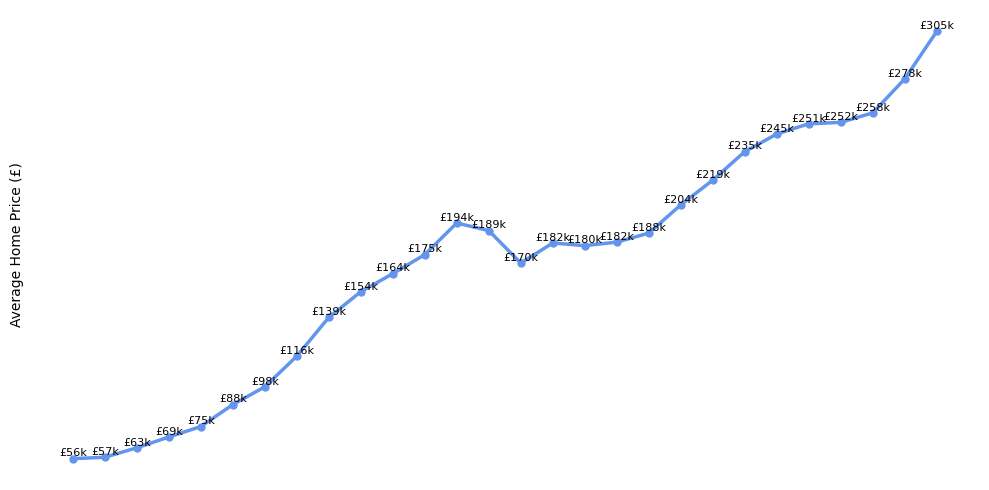

In [21]:
# plot HPI % change by year line chart
plt.figure(figsize=(10, 5))
line = grouped_year_df['AveragePrice'].plot(linestyle='-', linewidth=2.5, color='cornflowerblue', marker='o', markersize=5)
#plt.title('Average Monthly Home Price in the UK')
plt.xlabel('')
plt.ylabel('Average Home Price (£)')
plt.yticks([])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{int(x):,}'))
plt.xticks([])
# remove square 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Add data labels to each data point just above the dot
for x, y in zip(grouped_year_df.index, grouped_year_df['AveragePrice']):
    plt.text(x, y + 100, f'£{int(y / 1000):,}k', ha='center', va='bottom', fontsize=8, color='black')  # Adjust position to place label just above the dot


# Show plot
plt.tight_layout()
plt.show()